## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.107029  1.333618  0.252498 -0.187742 -0.241147  0.527405
1 -0.029878 -1.458483  0.356742 -0.478792  1.345163 -1.074751
2  0.883007 -0.237027  0.734680  0.302011 -1.622139  0.357373
3 -0.119898  1.006128  0.063147 -1.405782  1.483906  0.078675
4 -0.005239  1.406408  1.405187  0.204434 -0.476089  1.422548


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9695425	total: 59ms	remaining: 59s
1:	learn: 0.9606021	total: 61.1ms	remaining: 30.5s
2:	learn: 0.9505296	total: 61.8ms	remaining: 20.5s
3:	learn: 0.9413011	total: 62.3ms	remaining: 15.5s
4:	learn: 0.9318407	total: 62.9ms	remaining: 12.5s
5:	learn: 0.9237031	total: 63.4ms	remaining: 10.5s
6:	learn: 0.9134528	total: 64.8ms	remaining: 9.19s
7:	learn: 0.9033953	total: 65.4ms	remaining: 8.1s
8:	learn: 0.8952500	total: 65.9ms	remaining: 7.26s
9:	learn: 0.8868891	total: 66.5ms	remaining: 6.58s
10:	learn: 0.8784108	total: 66.9ms	remaining: 6.01s
11:	learn: 0.8688438	total: 67.4ms	remaining: 5.55s
12:	learn: 0.8605071	total: 68.4ms	remaining: 5.19s
13:	learn: 0.8525445	total: 68.9ms	remaining: 4.85s
14:	learn: 0.8462654	total: 69.4ms	remaining: 4.56s
15:	learn: 0.8391204	total: 69.9ms	remaining: 4.3s
16:	learn: 0.8320983	total: 70.4ms	remaining: 4.07s
17:	learn: 0.8245153	total: 70.8ms	remaining: 3.86s
18:	learn: 0.8172261	total: 71.3ms	remaining: 3.68

97:	learn: 0.4410445	total: 108ms	remaining: 997ms
98:	learn: 0.4375350	total: 109ms	remaining: 992ms
99:	learn: 0.4348642	total: 109ms	remaining: 985ms
100:	learn: 0.4321251	total: 110ms	remaining: 979ms
101:	learn: 0.4290201	total: 110ms	remaining: 972ms
102:	learn: 0.4268156	total: 111ms	remaining: 965ms
103:	learn: 0.4239031	total: 111ms	remaining: 959ms
104:	learn: 0.4203055	total: 112ms	remaining: 954ms
105:	learn: 0.4166022	total: 112ms	remaining: 949ms
106:	learn: 0.4134694	total: 113ms	remaining: 942ms
107:	learn: 0.4104891	total: 113ms	remaining: 935ms
108:	learn: 0.4081734	total: 114ms	remaining: 928ms
109:	learn: 0.4058128	total: 114ms	remaining: 923ms
110:	learn: 0.4035137	total: 114ms	remaining: 917ms
111:	learn: 0.4003790	total: 116ms	remaining: 918ms
112:	learn: 0.3981393	total: 116ms	remaining: 913ms
113:	learn: 0.3955471	total: 117ms	remaining: 906ms
114:	learn: 0.3931110	total: 117ms	remaining: 902ms
115:	learn: 0.3915922	total: 118ms	remaining: 897ms
116:	learn: 0.3

264:	learn: 0.1532440	total: 187ms	remaining: 519ms
265:	learn: 0.1523453	total: 188ms	remaining: 519ms
266:	learn: 0.1516676	total: 189ms	remaining: 520ms
267:	learn: 0.1509371	total: 190ms	remaining: 518ms
268:	learn: 0.1498893	total: 190ms	remaining: 517ms
269:	learn: 0.1488921	total: 191ms	remaining: 515ms
270:	learn: 0.1481018	total: 191ms	remaining: 514ms
271:	learn: 0.1470273	total: 191ms	remaining: 512ms
272:	learn: 0.1460468	total: 192ms	remaining: 511ms
273:	learn: 0.1450496	total: 192ms	remaining: 510ms
274:	learn: 0.1440104	total: 193ms	remaining: 508ms
275:	learn: 0.1433006	total: 193ms	remaining: 507ms
276:	learn: 0.1423373	total: 194ms	remaining: 506ms
277:	learn: 0.1415227	total: 194ms	remaining: 504ms
278:	learn: 0.1406739	total: 195ms	remaining: 503ms
279:	learn: 0.1399644	total: 195ms	remaining: 502ms
280:	learn: 0.1390413	total: 195ms	remaining: 500ms
281:	learn: 0.1381711	total: 196ms	remaining: 499ms
282:	learn: 0.1372647	total: 196ms	remaining: 497ms
283:	learn: 

474:	learn: 0.0490150	total: 291ms	remaining: 322ms
475:	learn: 0.0487891	total: 292ms	remaining: 322ms
476:	learn: 0.0485902	total: 293ms	remaining: 321ms
477:	learn: 0.0483318	total: 293ms	remaining: 320ms
478:	learn: 0.0480811	total: 294ms	remaining: 319ms
479:	learn: 0.0478035	total: 294ms	remaining: 319ms
480:	learn: 0.0475010	total: 294ms	remaining: 318ms
481:	learn: 0.0473029	total: 295ms	remaining: 317ms
482:	learn: 0.0471441	total: 295ms	remaining: 316ms
483:	learn: 0.0469299	total: 296ms	remaining: 316ms
484:	learn: 0.0467449	total: 296ms	remaining: 315ms
485:	learn: 0.0465078	total: 297ms	remaining: 314ms
486:	learn: 0.0462506	total: 297ms	remaining: 313ms
487:	learn: 0.0459937	total: 298ms	remaining: 313ms
488:	learn: 0.0457640	total: 299ms	remaining: 312ms
489:	learn: 0.0455141	total: 299ms	remaining: 311ms
490:	learn: 0.0454211	total: 299ms	remaining: 310ms
491:	learn: 0.0451373	total: 300ms	remaining: 309ms
492:	learn: 0.0448840	total: 300ms	remaining: 309ms
493:	learn: 

550:	learn: 0.0352362	total: 328ms	remaining: 267ms
551:	learn: 0.0350483	total: 329ms	remaining: 267ms
552:	learn: 0.0348677	total: 329ms	remaining: 266ms
553:	learn: 0.0346901	total: 330ms	remaining: 265ms
554:	learn: 0.0345181	total: 330ms	remaining: 265ms
555:	learn: 0.0343544	total: 331ms	remaining: 264ms
556:	learn: 0.0341673	total: 331ms	remaining: 264ms
557:	learn: 0.0340008	total: 332ms	remaining: 263ms
558:	learn: 0.0338273	total: 332ms	remaining: 262ms
559:	learn: 0.0336259	total: 333ms	remaining: 262ms
560:	learn: 0.0334822	total: 334ms	remaining: 261ms
561:	learn: 0.0334287	total: 334ms	remaining: 260ms
562:	learn: 0.0332543	total: 335ms	remaining: 260ms
563:	learn: 0.0330496	total: 335ms	remaining: 259ms
564:	learn: 0.0328718	total: 336ms	remaining: 258ms
565:	learn: 0.0326976	total: 336ms	remaining: 258ms
566:	learn: 0.0325449	total: 337ms	remaining: 257ms
567:	learn: 0.0323614	total: 337ms	remaining: 257ms
568:	learn: 0.0321979	total: 338ms	remaining: 256ms
569:	learn: 

685:	learn: 0.0205754	total: 392ms	remaining: 179ms
686:	learn: 0.0204870	total: 392ms	remaining: 179ms
687:	learn: 0.0204077	total: 392ms	remaining: 178ms
688:	learn: 0.0203626	total: 393ms	remaining: 177ms
689:	learn: 0.0202589	total: 393ms	remaining: 177ms
690:	learn: 0.0202149	total: 394ms	remaining: 176ms
691:	learn: 0.0201430	total: 394ms	remaining: 175ms
692:	learn: 0.0200895	total: 394ms	remaining: 175ms
693:	learn: 0.0200598	total: 395ms	remaining: 174ms
694:	learn: 0.0200294	total: 395ms	remaining: 174ms
695:	learn: 0.0199841	total: 396ms	remaining: 173ms
696:	learn: 0.0199587	total: 396ms	remaining: 172ms
697:	learn: 0.0199392	total: 397ms	remaining: 172ms
698:	learn: 0.0198697	total: 397ms	remaining: 171ms
699:	learn: 0.0198505	total: 398ms	remaining: 170ms
700:	learn: 0.0198316	total: 398ms	remaining: 170ms
701:	learn: 0.0197469	total: 399ms	remaining: 169ms
702:	learn: 0.0196964	total: 400ms	remaining: 169ms
703:	learn: 0.0196779	total: 400ms	remaining: 168ms
704:	learn: 

901:	learn: 0.0106840	total: 495ms	remaining: 53.8ms
902:	learn: 0.0106793	total: 496ms	remaining: 53.3ms
903:	learn: 0.0106411	total: 496ms	remaining: 52.7ms
904:	learn: 0.0105781	total: 497ms	remaining: 52.1ms
905:	learn: 0.0105303	total: 497ms	remaining: 51.6ms
906:	learn: 0.0104675	total: 498ms	remaining: 51ms
907:	learn: 0.0104065	total: 498ms	remaining: 50.5ms
908:	learn: 0.0103923	total: 499ms	remaining: 49.9ms
909:	learn: 0.0103874	total: 499ms	remaining: 49.4ms
910:	learn: 0.0103277	total: 500ms	remaining: 48.8ms
911:	learn: 0.0103030	total: 500ms	remaining: 48.3ms
912:	learn: 0.0102981	total: 501ms	remaining: 47.7ms
913:	learn: 0.0102746	total: 501ms	remaining: 47.2ms
914:	learn: 0.0102698	total: 502ms	remaining: 46.6ms
915:	learn: 0.0102654	total: 502ms	remaining: 46.1ms
916:	learn: 0.0102197	total: 503ms	remaining: 45.5ms
917:	learn: 0.0102149	total: 503ms	remaining: 44.9ms
918:	learn: 0.0102103	total: 503ms	remaining: 44.4ms
919:	learn: 0.0101498	total: 504ms	remaining: 43

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

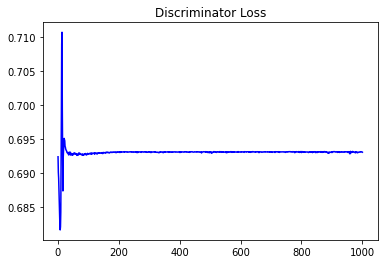

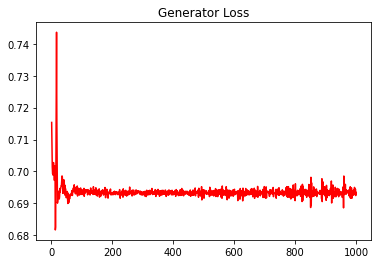

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14172052317761294


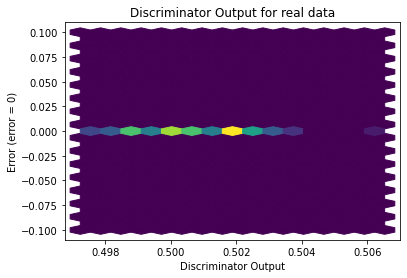

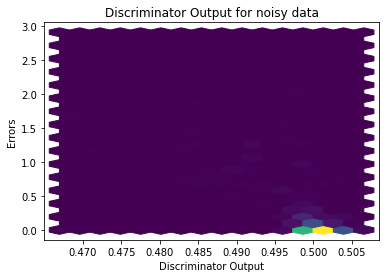

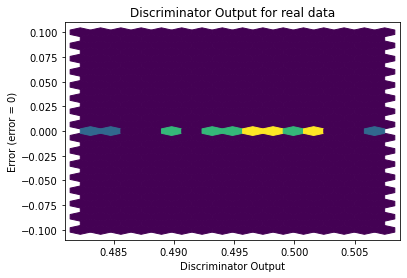

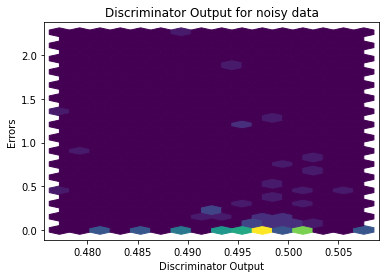

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


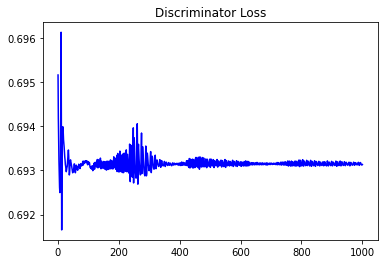

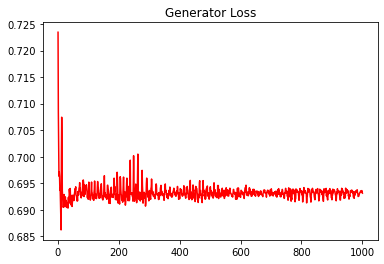

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16618531850096627


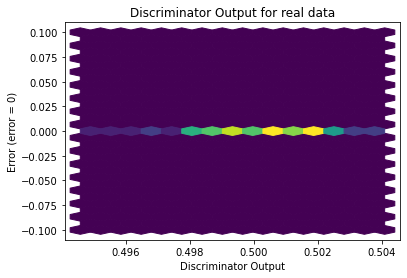

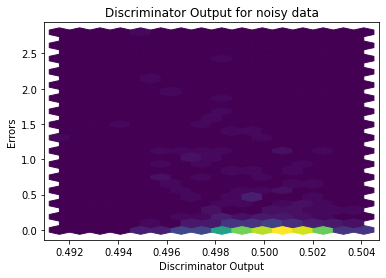

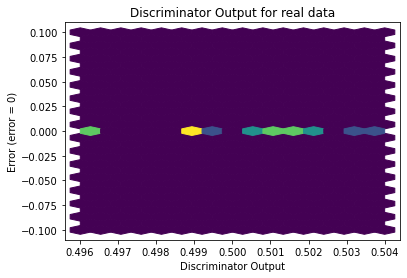

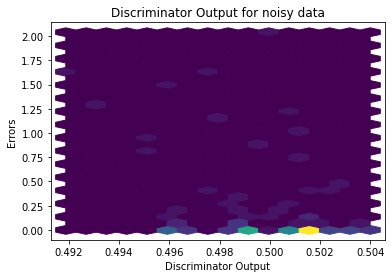

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0393]], requires_grad=True)
